<a href="https://colab.research.google.com/github/angelarwa/TIL/blob/master/nlp_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.datasets import imdb
from konlpy.tag import Twitter #pip install konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma 
from konlpy.tag import Twitter
from pprint import pprint
import nltk #영문 자연어처리 패키지
from nltk.classify.scikitlearn import SklearnClassifier
from wordcloud import WordCloud, STOPWORDS #pip install wordcloud
from gensim import corpora, models #pip install gensim
import numpy  as np 
from PIL import Image
from wordcloud import ImageColorGenerator
import glob
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline


In [0]:
#이미지 업로드
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving TFIDF.png to TFIDF.png
User uploaded file "TFIDF.png" with length 75080 bytes


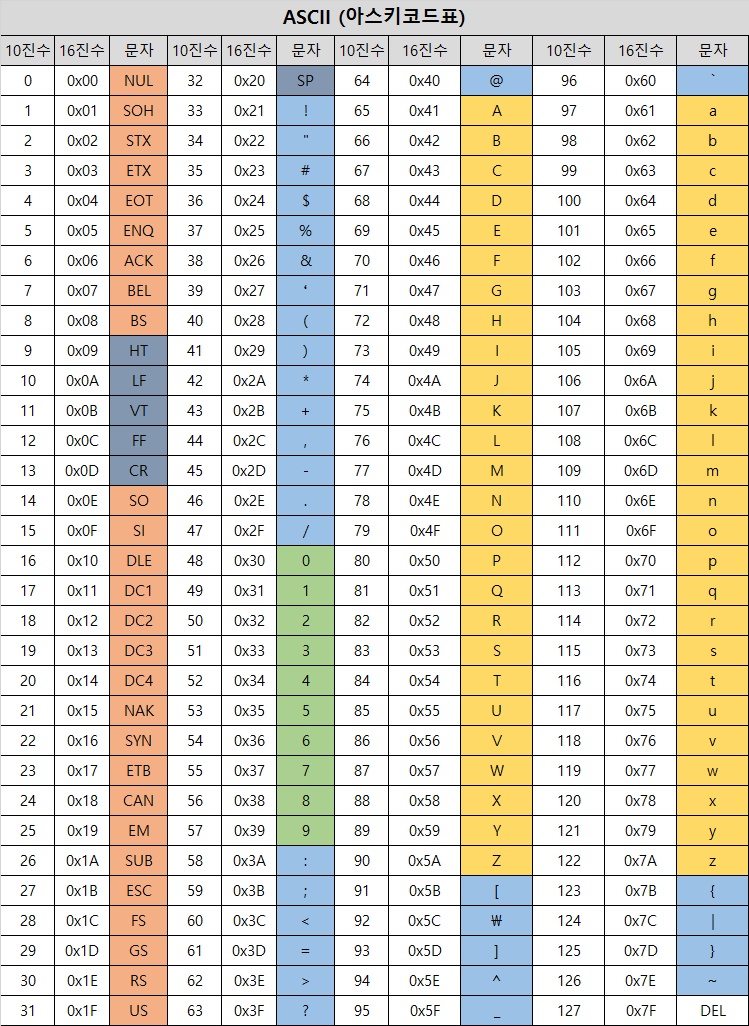

In [0]:
# ls -al
from IPython.display import Image
Image('ASCII.png', width=500)

In [0]:
!pip install jpype1
# conda install -c conda-forge jpype1
#김기현의 자연어 처리 딥러닝 캠프 책 참고

In [0]:
ko_str='이것은 한국어 문장입니다.'
en_str='This is English sentences.'
ja_str = 'これは日本語の文章です。'
ch_str='统一码。' #这是汉语句子。
fr_str='la langue française'
print(ko_str[0])
#ord: 아스키코드(ASCII) 값을 가져옴
print(ord(ko_str[0])) #50000번대
print(ord(ja_str[0])) #10000번대
print(ord(en_str[0])) #80번대
print(ord(ch_str[0])) #30000번대
print(ord(fr_str[0])) #100번대

이
51060
12371
84
32479
108


In [0]:
#Unicode 코드 포인트로 출현 빈도 판정하기
def count_codePoint(str): #unicode 코드포인트를 저장할 배열 준비
  counter=np.zeros(65535)
  for i in range(len(str)): #각 문자를 unicode 코드포인트로 변환
    code_point=ord(str[i])
    if code_point>65535:
      continue
    counter[code_point]+=1 #출현횟수 세기
  counter=counter/len(str) #각 요소를 문자 수로 나눠서 정규화
  return counter

In [0]:
#학습전용 데이터 준비
x_train=[count_codePoint(ko_str),count_codePoint(ja_str),count_codePoint(en_str)]
y_train=['ko','ja','en']

print(x_train[0])
idx=np.where(x_train[0]>0)

data=x_train[0] #첫번째 한글 문장
print(data[idx]) #첫번째 한글 문장에서 발생빈도수가 0보다 큰것의 값들을 표시

[0. 0. 0. ... 0. 0. 0.]
[0.14285714 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.07142857]


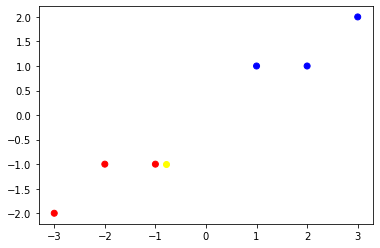

In [0]:
#(참고)알고리즘: 평균구해서 정규분포->확률값이 큰 쪽으로 분류

#X = np.array([[-1, -1], [3, 2]])
#Y = np.array([1,  2])
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])

color = ['red' if y==1 else 'blue'  for y in Y] #Y값이 1이면 빨강, 그외(2)에는 파랑색
plt.scatter(X[:,0], X[:,1], color=color) #plt.scatter((x,y)좌표에 점찍기,color 설정)

t = np.array([[-0.8, -1]])
plt.scatter(t[:,0], t[:,1], color='yellow') 

In [0]:
#(참고)정규분포 나이브베이즈
clf= GaussianNB() 
clf.fit(X,Y)
print(clf.predict([[-0.8,-1]])) #[1] =red로 분류
# clf.fit([[0,0],[0,1],[1,0],[1,1]],[0,1,1,0])
# print(clf.predict([[1,-1]]))

[1]


In [0]:
#학습하기
clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict([count_codePoint('안녕, 어디야')])
print(y_pred)

['ko']


In [0]:
#평가전용 데이터 준비
ko_test_str='안녕, 어디야'
ja_test_str = 'こんにちは'
en_test_str = 'Hello'
fr_test_str='Le corps exquis, exquise-moi '
x_test = [count_codePoint(en_test_str),count_codePoint(ja_test_str),count_codePoint(ko_test_str)]
y_test = ['en', 'ja', 'ko']

#평가
y_pred = clf.predict(x_test)
print(y_pred)
print("정답률 = " , accuracy_score(y_test, y_pred)) 

['en' 'ja' 'ko']
정답률 =  1.0


## 문자셋이 동일한 경우

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# 학습 데이터 준비하기
x_train = []
y_train = []
a=glob.glob('/content/gdrive/My Drive/AI/TIL/data/language/train/*.txt')
for file in a:
    # 언어 정보를 추출하고 레이블로 지정하기
    print(file)
    y_train.append(file[53:55])
    
    # 파일 내부의 문자열을 모두 추출한 뒤 빈도 배열로 변환한 뒤 입력 데이터로 사용하기
    file_str = ''
    for line in open(file, 'r', encoding='UTF8'):
        file_str = file_str + line
    x_train.append(count_codePoint(file_str))

# 학습하기
clf = GaussianNB() 
clf.fit(x_train, y_train)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/AI/TIL/data/language/train/de_cat.txt
/content/gdrive/My Drive/AI/TIL/data/language/train/es_cat.txt
/content/gdrive/My Drive/AI/TIL/data/language/train/de_dog.txt
/content/gdrive/My Drive/AI/TIL/data/language/train/en_cat.txt
/content/gdrive/My Drive/AI/TIL/data/language/train/en_dog.txt
/content/gdrive/My Drive/AI/TIL/data/language/train/de_elephant.txt
/content/gdrive/My Drive/AI/TIL/data/language/train/en_elephant.txt
/content/gdr

GaussianNB(priors=None, var_smoothing=1e-09)

### 단어 빈도수 기반 자연어 처리
https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/

In [0]:
corpus=['you know I want your love','I like you','what should I do']
str=" ".join(corpus) #문장을 하나로 묶어줌
print(str)
words=str.split(' ') #스페이스를 기준으로 단어로 분할
print(words)

freq={} #딕셔너리 정의
for w in words: #단어수만큼 루프를 돌게함
  freq[w]=freq.get(w,0)+1 #디폴트값을 0으로 줌   
  #freq[w]+=1 & freq[w]=freq[w]+1과 같은 의미
print(freq) #print(freq['I'])과 같이 특정한 단어의 빈도수만 출력할 수도 있음

you know I want your love I like you what should I do
['you', 'know', 'I', 'want', 'your', 'love', 'I', 'like', 'you', 'what', 'should', 'I', 'do']
{'you': 2, 'know': 1, 'I': 3, 'want': 1, 'your': 1, 'love': 1, 'like': 1, 'what': 1, 'should': 1, 'do': 1}


### CountVectorizer: 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만든다
1. 문서를 토큰 리스트로 변환한다.
2. 각 문서에서 토큰의 출현 빈도를 센다.
3. 각 문서를 BOW 인코딩 벡터로 변환한다.

In [0]:
#문장 내에서 해당 단어가 있나없나 벡터를 만듦/벡터화시키면 유사도 구분가능->거리, 분포도 계산가능
vector=CountVectorizer() #글자수가 1개인 것은 자동으로 제외한다. 여기서는 'I'제외
tf=vector.fit_transform(corpus)
print(tf) #해석: (0,7)의 위치가 1이다.
print(tf.toarray()) #3가지 문장에 대해서 one-hot encoding된 결과값
print(type(tf))
print(tf.shape) #(문장,단어수)=(3,9)

  (0, 7)	1
  (0, 1)	1
  (0, 5)	1
  (0, 8)	1
  (0, 3)	1
  (1, 7)	1
  (1, 2)	1
  (2, 6)	1
  (2, 4)	1
  (2, 0)	1
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
<class 'scipy.sparse.csr.csr_matrix'>
(3, 9)


In [0]:
print(vector.vocabulary_) #각 단어의 인덱스가 어떻게 부여되었는지를 보여줌
print(vector.vocabulary_['you']) #you라는 단어의 실제 인덱스 값
print(vector.vocabulary_.get('you'))

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
7
7


In [0]:
words=vector.get_feature_names() #어휘집을 출력. 일반적으로 많이 사용함
for word in words: print(word)
print('********')
for key in vector.vocabulary_:
  print(key, vector.vocabulary_[key]) #key, key값에 해당하는 인덱스

do
know
like
love
should
want
what
you
your
********
you 7
know 1
want 5
your 8
love 3
like 2
what 6
should 4
do 0


### TF-IDF(Term Frequency - Inverse Document Frequency)
* TF: 현재 문서에서 단어 A가 나타난 횟수
* DF: 단어가 나타난 문서의 수
* 특정 단어의 상대적인 빈도를 나타내주는 값
* 값이 클수록 내 문서에만 많이 언급되는 단어(=다른 문서에서는 잘 언급 안됨)
* 값이 작을수록 다른 문서에서 잘 언급하는 단어를 의미(=현재 문서와 관련 없음)
* DF↑=모든 문서에서 자주 언급 ↔ 1/DF(=IDF)↑=특정 문서에서만 언급

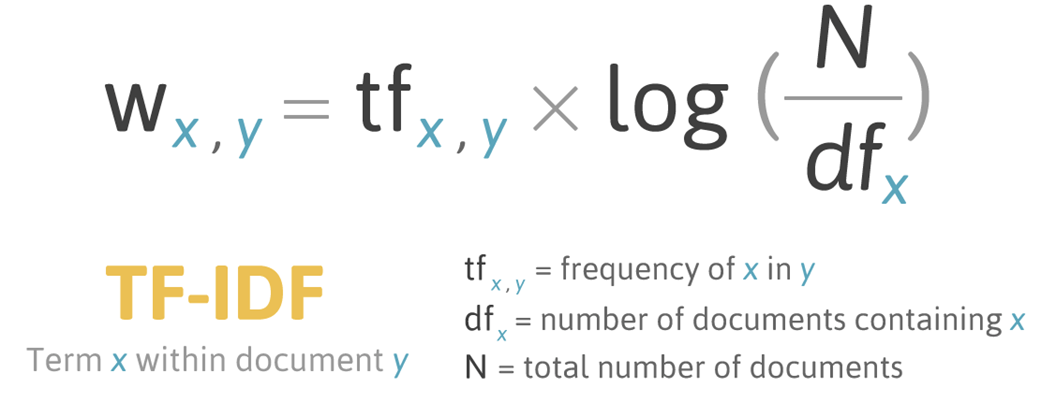

In [0]:
Image('TFIDF.png', width=500)

* 0~1사이로 정규화시키기 위해서 N/df처리
* tf스케일과 df스케일을 유사하게 하기위해서 log처리
* Tf값 계산하기
* tf값을 계산하는 방법에는 다양한 방법이 있다.
* 문서의 길이에 따라 단어의 빈도값을 조절할 수도 있다.
* boolean 빈도로 한번만 등장해도 1로 값을 정하는 경우도 있다.
* log를 사용하여 값을 조절할 수도 있다.

In [0]:
sent = ["오늘 휴일", 
        "휴일 오늘", 
        "휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다.", 
        "내일 은 반가운 비 소식 이 있습니다."] #은, 비, 이는 0처리 

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) #문장 벡터화 진행
print(tfidf_matrix) 
print(type(tfidf_matrix)) 
print(tfidf_matrix.toarray().shape) #문장 5개, 단어 18개
word=tfidf_vectorizer.get_feature_names()
print(word)
print(tfidf_matrix.toarray()) #각 단어는 0이 아닌 값을 가진다. 

  (0, 17)	0.6437444595062429
  (0, 7)	0.7652405313723362
  (1, 17)	0.6437444595062429
  (1, 7)	0.7652405313723362
  (2, 12)	0.28487998702172107
  (2, 6)	0.28487998702172107
  (2, 4)	0.28487998702172107
  (2, 1)	0.28487998702172107
  (2, 9)	0.35310140100264525
  (2, 14)	0.28487998702172107
  (2, 8)	0.35310140100264525
  (2, 13)	0.35310140100264525
  (2, 5)	0.35310140100264525
  (2, 17)	0.19893117008503197
  (2, 7)	0.23647612349029334
  (3, 11)	0.3542556015420614
  (3, 16)	0.3542556015420614
  (3, 3)	0.3542556015420614
  (3, 10)	0.3542556015420614
  (3, 0)	0.3542556015420614
  (3, 2)	0.3542556015420614
  (3, 15)	0.3542556015420614
  (3, 14)	0.28581118874948447
  (3, 17)	0.1995814265359179
  (4, 12)	0.5
  (4, 6)	0.5
  (4, 4)	0.5
  (4, 1)	0.5
<class 'scipy.sparse.csr.csr_matrix'>
(5, 18)
['갑작스런', '내일', '놀러왔다가', '망연자실', '반가운', '서쪽', '소식', '오늘', '으로', '이어졌는데요', '인해', '있습니', '있습니다', '중심', '폭염', '피해서', '하고', '휴일']
[[0.         0.         0.         0.         0.         0.
  0.         0.76524

In [0]:
mat=np.array(tfidf_matrix.toarray())
srch=['오늘','휴일'] 
srch_dtm=mat[:,[tfidf_vectorizer.vocabulary_.get(i) for i in srch]] #5개의 문장에서 두 단어에 대한 값만 가져옴
print(srch_dtm) 
#단어는 있지만, 휴일이라는 단어가 여기저기서 언급되..?
#tf=3.44937950448 / 1.06593397716

[[0.76524053 0.64374446]
 [0.76524053 0.64374446]
 [0.23647612 0.19893117]
 [0.         0.19958143]
 [0.         0.        ]]


In [0]:
score=srch_dtm.sum(axis=1) #오늘, 휴일에 대한 값의 합계
print(score)
print('/')

for i in range(len(score)):
  if score[i]>0:
    print('{}/score: {}'.format(sent[i],score[i])) #통문장/score

[1.40898499 1.40898499 0.43540729 0.19958143 0.        ]
/
오늘 휴일/score: 1.408984990878579
휴일 오늘/score: 1.408984990878579
휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다./score: 0.4354072935753253
폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니 다./score: 0.1995814265359179


In [0]:
sentences=['This is the first sentence.',
           'This is the second one.',
           'This is third one.' ,         
           'And then last one']
vect=TfidfVectorizer()

X=vect.fit_transform(sentences)
y=[1,2,3,4]

model=SGDClassifier(loss='perceptron')
print(model)
model.fit(X,y)

X_pred=vect.transform(['This is my new sentence'])
print(X_pred)
y_pred=model.predict(X_pred)
print(y_pred) #입력 데이터가 어느 문장과 가장 유사한지 확인

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='perceptron',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
  (0, 10)	0.473804485472565
  (0, 6)	0.7423062838829776
  (0, 2)	0.473804485472565
[1]
